### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

### Load the data

In [2]:
cancer = pd.read_csv('kanker.data')
del cancer['id_number']
cancer.head()

,clump,u_cellsize,u_cellshape,adhesion,se_cellsize,br_nuclei,bl_chromatin,n_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Details about data

In [3]:
rows, columns = cancer.shape
print("Rows: ", rows)
print("Columns: ", columns)

Rows:  699
Columns:  10


In [4]:
cancer.describe()

,clump,u_cellsize,u_cellshape,adhesion,se_cellsize,bl_chromatin,n_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Show how many data for each class
2 for Benign, 4 for Malignant

2    458
4    241
Name: class, dtype: int64

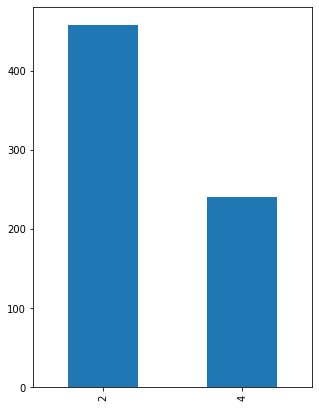

In [5]:
cancer['class'].value_counts().plot(kind='bar', figsize=(5,7))
cancer['class'].value_counts()

### Frequency for each data

###Clump Frequency

<AxesSubplot:>

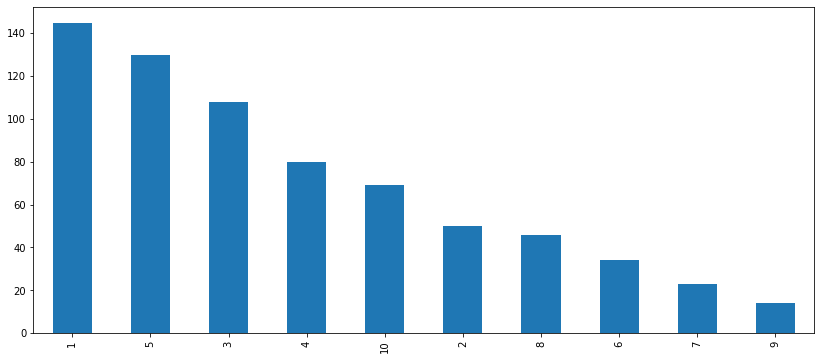

In [6]:
cancer['clump'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

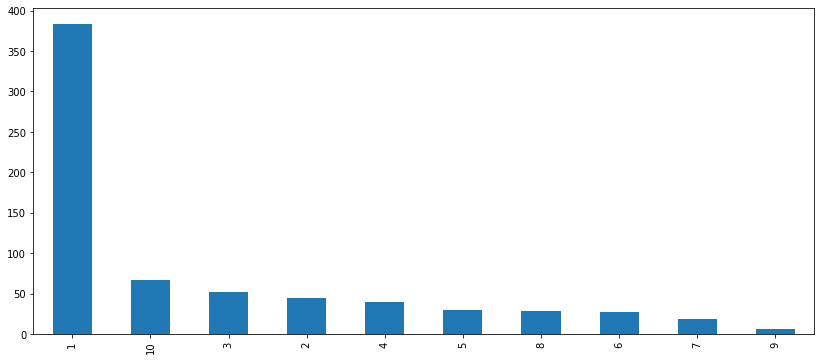

In [7]:
cancer['u_cellsize'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

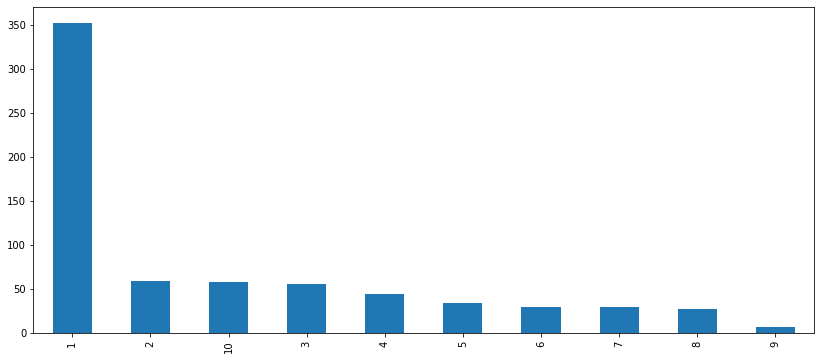

In [8]:
cancer['u_cellshape'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

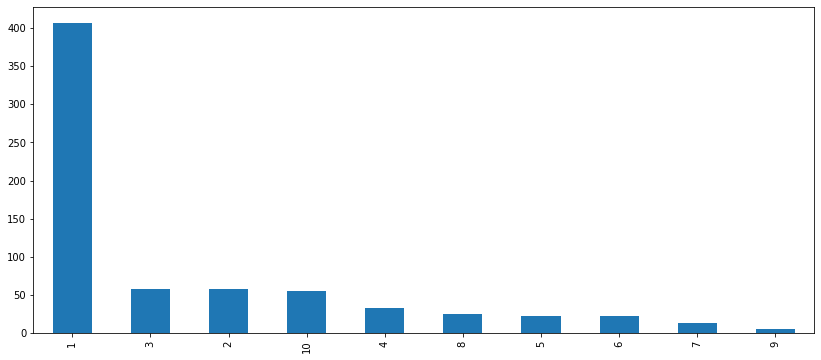

In [9]:
cancer['adhesion'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

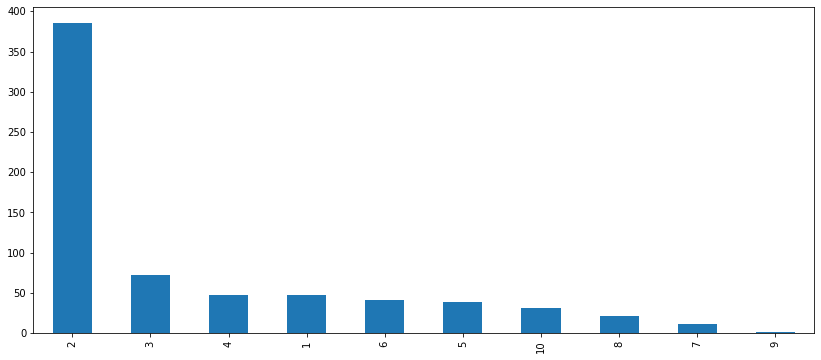

In [10]:
cancer['se_cellsize'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

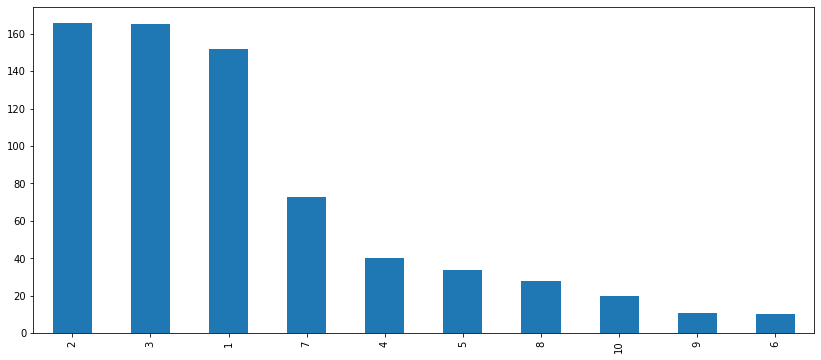

In [11]:
cancer['bl_chromatin'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

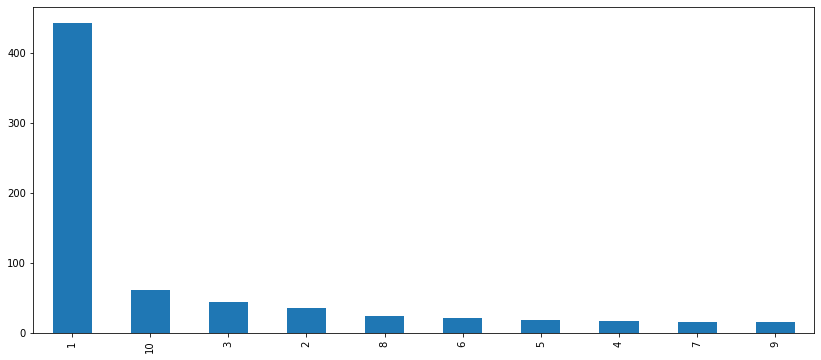

In [12]:
cancer['n_nucleoli'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

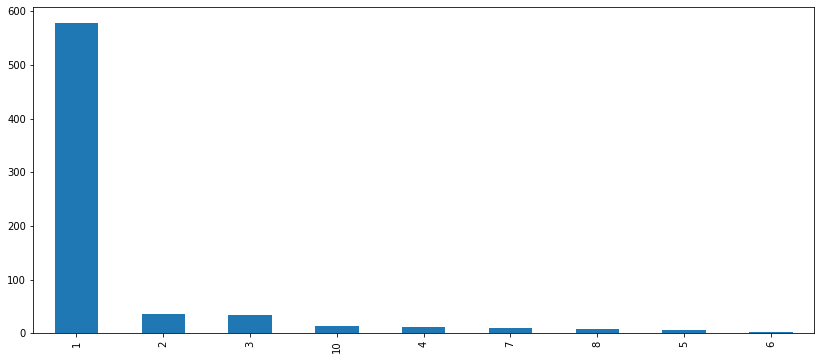

In [13]:
cancer['mitoses'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

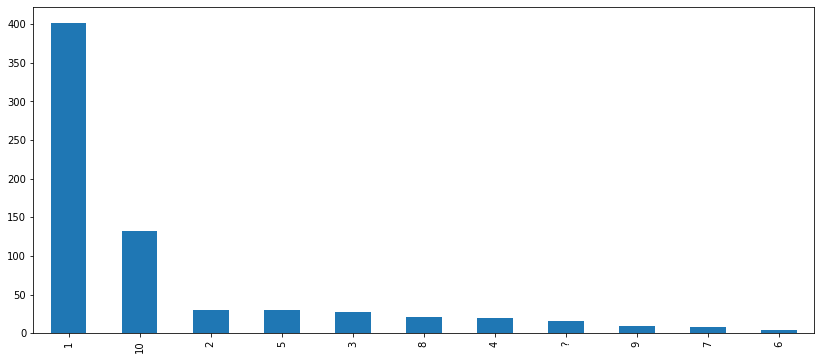

In [14]:
cancer['br_nuclei'].value_counts().plot(kind='bar', figsize=(14,6))

### Checking for each column if there's any null value

In [15]:
cancer.isnull().sum()
cancer.isna().sum()

clump           0
u_cellsize      0
u_cellshape     0
adhesion        0
se_cellsize     0
br_nuclei       0
bl_chromatin    0
n_nucleoli      0
mitoses         0
class           0
dtype: int64

In [16]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   clump         699 non-null    int64 
 1   u_cellsize    699 non-null    int64 
 2   u_cellshape   699 non-null    int64 
 3   adhesion      699 non-null    int64 
 4   se_cellsize   699 non-null    int64 
 5   br_nuclei     699 non-null    object
 6   bl_chromatin  699 non-null    int64 
 7   n_nucleoli    699 non-null    int64 
 8   mitoses       699 non-null    int64 
 9   class         699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### Transform all values into numerical values

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
clump_size = le.fit_transform(list(cancer["clump"]))
u_cellsize = le.fit_transform(list(cancer["u_cellsize"]))
u_cellshape = le.fit_transform(list(cancer["u_cellshape"]))
adhesion = le.fit_transform(list(cancer["adhesion"]))
se_cellsize = le.fit_transform(list(cancer["se_cellsize"]))
br_nuclei = le.fit_transform(list(cancer["br_nuclei"]))
bl_chromatin = le.fit_transform(list(cancer["bl_chromatin"]))
n_nucleoli = le.fit_transform(list(cancer["n_nucleoli"]))
mitoses = le.fit_transform(list(cancer["mitoses"]))
cls = le.fit_transform(list(cancer["class"]))

print('clump_size', type(clump_size))
print('u_cellsize', type(u_cellsize))
print('u_cellshape', type(u_cellshape))
print('adhesion', type(adhesion))
print('se_cellsize', type(se_cellsize))
print('br_nuclei', type(br_nuclei))
print('bl_chromatin', type(bl_chromatin))
print('n_nucleoli', type(n_nucleoli))
print('mitoses', type(mitoses))
print('class', type(cls))

clump_size <class 'numpy.ndarray'>
u_cellsize <class 'numpy.ndarray'>
u_cellshape <class 'numpy.ndarray'>
adhesion <class 'numpy.ndarray'>
se_cellsize <class 'numpy.ndarray'>
br_nuclei <class 'numpy.ndarray'>
bl_chromatin <class 'numpy.ndarray'>
n_nucleoli <class 'numpy.ndarray'>
mitoses <class 'numpy.ndarray'>
class <class 'numpy.ndarray'>


In [18]:
cancer.corr()

,clump,u_cellsize,u_cellshape,adhesion,se_cellsize,bl_chromatin,n_nucleoli,mitoses,class
clump,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
u_cellsize,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
u_cellshape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
se_cellsize,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bl_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
n_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


### Start modelling the data

In [19]:
from sklearn.model_selection import train_test_split

X = list(zip(clump_size, u_cellsize, u_cellshape, adhesion, se_cellsize, br_nuclei, bl_chromatin, n_nucleoli,mitoses))
Y = list(cls)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)

### Data Standarizations

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

[[-0.5207752  -0.38829188 -0.74553945 ... -0.18589057 -0.61821331
  -0.34766824]
 [ 1.991917    2.22683052  2.25510773 ...  2.65547584  2.36952077
   3.5007782 ]
 [-1.23868726 -0.06140158 -0.74553945 ... -0.59180006 -0.28624286
  -0.34766824]
 ...
 [-0.5207752  -0.71518218 -0.74553945 ... -0.99770954 -0.61821331
  -0.34766824]
 [ 1.27400494  0.26548872  0.92148676 ...  0.22001892  0.04572759
  -0.34766824]
 [ 1.991917   -0.06140158 -0.07872897 ...  1.43774738  0.04572759
   0.93514724]]
[[-0.5207752  -0.38829188 -0.41213421 ...  0.22001892 -0.28624286
  -0.34766824]
 [ 1.991917    0.59237902  0.58808152 ...  1.43774738 -0.61821331
  -0.34766824]
 [-1.23868726 -0.71518218 -0.74553945 ... -0.99770954 -0.61821331
  -0.34766824]
 ...
 [-0.16181918  0.91926932  0.92148676 ...  1.43774738  1.37360941
   0.93514724]
 [ 1.991917    2.22683052  2.25510773 ...  1.43774738  2.36952077
   4.78359367]
 [ 0.55609288  2.22683052  2.25510773 ...  1.84365686  2.36952077
   4.78359367]]


In [228]:
from tabulate import tabulate

train = [['clump', 'u_cellsize', 'u_cellshape', 'adhesion', 'se_cellsize', 'br_nuclei', 'bl_chromatin', 'n_nucleoli',
        'mitoses'],
       [1.00, 0.33, 0.20, 0.00, 0.22, 0.33, 0.40, 0.22, 1.00]]

print('Data Uji')
print('\n')

print(tabulate(train, headers='firstrow'))

test = [['clump', 'u_cellsize', 'u_cellshape', 'adhesion', 'se_cellsize', 'br_nuclei', 'bl_chromatin', 'n_nucleoli',
            'mitoses'],
           [0.571428571, 0.111111111, 0.222222222, 0.333333333, 0, 0.666666667, 0.222222222, 0.833333333, 0],
           [0.571428571, 0.333333333, 0.333333333, 0.444444444, 1, 1, 0.222222222, 0.166666667, 0],
           [1, 0.666666667, 0.444444444, 1, 1, 0.888888889, 0.444444444, 0.666666667, 0.75],
           [0.714285714, 0.777777778, 0.777777778, 0, 0.2, 0.333333333, 0.222222222, 1, 0],
           [0.428571429, 0, 0, 0.222222222, 0, 0, 0.222222222, 0, 0],
           [1, 1, 1, 0.777777778, 1, 1, 0.888888889, 1, 0],
           [0, 0, 0, 0, 0, 1, 0.222222222, 0, 0],
           [0.142857143, 0, 0.111111111, 0, 0, 0, 0.222222222, 0, 0],
           [0.857142857, 0.333333333, 0.555555556, 0.333333333, 0.8, 0, 0.333333333, 0.333333333, 0],
           [0.428571429, 0.111111111, 0, 0, 0, 0, 0.111111111, 0, 0]]
print('\n')
print('Data Latih')
print('\n')
print(tabulate(test, headers='firstrow'))

Data Uji


  clump    u_cellsize    u_cellshape    adhesion    se_cellsize    br_nuclei    bl_chromatin    n_nucleoli    mitoses
-------  ------------  -------------  ----------  -------------  -----------  --------------  ------------  ---------
      1          0.33            0.2           0           0.22         0.33             0.4          0.22          1


Data Latih


   clump    u_cellsize    u_cellshape    adhesion    se_cellsize    br_nuclei    bl_chromatin    n_nucleoli    mitoses
--------  ------------  -------------  ----------  -------------  -----------  --------------  ------------  ---------
0.571429      0.111111       0.222222    0.333333            0       0.666667        0.222222      0.833333       0
0.571429      0.333333       0.333333    0.444444            1       1               0.222222      0.166667       0
1             0.666667       0.444444    1                   1       0.888889        0.444444      0.666667       0.75
0.714286      0.777778       0.

In [229]:
test = test[1:]
train = train[1:]

In [239]:
import math

hasil = []
col = 0

for j in range(len(test)):
    for k in range(len(test)):
#         print(j,k)
        col += (train[0][k] - test[j][k]) ** 2
        if(k == 8):
            break
    
    math.sqrt(col)
    hasil.append(col)
    col = 0

hasil = list(enumerate(hasil, 1))
ranking = sorted(hasil, key=lambda x:x[1])

ranking.insert(0, ("Data Uji ke", "Jarak antar data"))
print(tabulate(ranking, headers="firstrow", showindex=True, tablefmt='grid'))

+----+---------------+--------------------+
|    |   Data Uji ke |   Jarak antar data |
+====+===============+====================+
|  0 |            10 |            1.7036  |
+----+---------------+--------------------+
|  1 |             9 |            1.72054 |
+----+---------------+--------------------+
|  2 |             5 |            1.76212 |
+----+---------------+--------------------+
|  3 |             1 |            1.91272 |
+----+---------------+--------------------+
|  4 |             8 |            2.0888  |
+----+---------------+--------------------+
|  5 |             4 |            2.25638 |
+----+---------------+--------------------+
|  6 |             3 |            2.35784 |
+----+---------------+--------------------+
|  7 |             2 |            2.49074 |
+----+---------------+--------------------+
|  8 |             7 |            2.7262  |
+----+---------------+--------------------+
|  9 |             6 |            4.59855 |
+----+---------------+----------

### KNN Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

### Saving KNN model into pickle file

In [22]:
with open("data/KNNModel.pickle", "wb") as f:
    pickle.dump(classifier, f)

In [23]:
predictions = classifier.predict(X_test)
names = ["2", "4"]

for x in range(len(predictions)):
    print("Prediction: ", names[predictions[x]])
    print("Actual: ", names[Y_test[x]])
    print("")

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

P

### Confusion Matrix for KNN

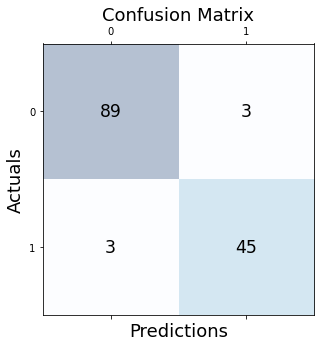

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### F1 Score for KNN

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Precision: %.3f" % precision_score(Y_test, Y_pred))
print("Recall: %.3f" % recall_score(Y_test, Y_pred))
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))
print("F1 Score: %.3f" % f1_score(Y_test, Y_pred))

KNN_ps = precision_score(Y_test, Y_pred)
KNN_rs = recall_score(Y_test, Y_pred)
KNN_as = accuracy_score(Y_test, Y_pred)
KNN_f1 = f1_score(Y_test, Y_pred)

Precision: 0.938
Recall: 0.938
Accuracy: 0.957
F1 Score: 0.938


In [247]:
hasilsvm = []
actual = []
train = [
        [0.11, 0.22, 1],
        [0.33, 0.33, -1],
        [0.67, 0.44, 1],
        [0.78, 0.78, -1],
        [0.00, 0.00, -1],
        [1.00, 1.00, 1],
        [0.00, 0.00, -1],
        [0.00, 0.11, -1],
        [0.33, 0.56, 1],
        [0.11, 0.00, -1]]

for i in range(len(train)):
    colsvm = train[i][0] + train[i][1] - 1
    if(colsvm < 0):
        colsvm = -1
    else:
        colsvm = 1
        
    hasilsvm.append(colsvm)
    
    actual.append(train[i][2])

lists = list(zip(hasilsvm,actual))

In [248]:
lists.insert(0, ("Predicitions", "Actuals"))

In [250]:
print(tabulate(lists, headers="firstrow", showindex=True, tablefmt="grid"))

+----+----------------+-----------+
|    |   Predicitions |   Actuals |
+====+================+===========+
|  0 |             -1 |         1 |
+----+----------------+-----------+
|  1 |             -1 |        -1 |
+----+----------------+-----------+
|  2 |              1 |         1 |
+----+----------------+-----------+
|  3 |              1 |        -1 |
+----+----------------+-----------+
|  4 |             -1 |        -1 |
+----+----------------+-----------+
|  5 |              1 |         1 |
+----+----------------+-----------+
|  6 |             -1 |        -1 |
+----+----------------+-----------+
|  7 |             -1 |        -1 |
+----+----------------+-----------+
|  8 |             -1 |         1 |
+----+----------------+-----------+
|  9 |             -1 |        -1 |
+----+----------------+-----------+


In [222]:
lists = lists[1:]

### SVM Model

In [26]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'poly', degree=8)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

### Saving SVM model into pickle file

In [27]:
with open("data/SVMModel.pickle", "wb") as f:
    pickle.dump(classifier, f)

In [28]:
predictions = classifier.predict(X_test)
names = ["2", "4"]

for x in range(len(predictions)):
    print("Prediction: ", names[predictions[x]])
    print("Actual: ", names[Y_test[x]])
    print("")

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  4

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  2

Prediction:  2
Actual:  4

Prediction:  4
Actual:  4

Prediction:  2
Actual:  2

P

### Confusion Matrix for SVM

120


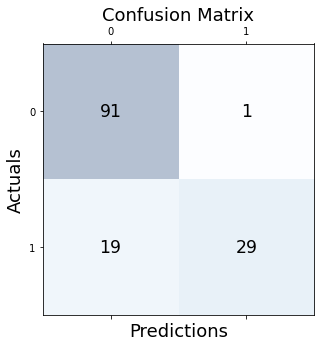

In [29]:
cm = confusion_matrix(Y_test, Y_pred)
c = print(cm[0, 0] + cm[1, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### F1 Score for SVM

In [30]:
print("Precision: %.3f" % precision_score(Y_test, Y_pred))
print("Recall: %.3f" % recall_score(Y_test, Y_pred))
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))
print("F1 Score: %.3f" % f1_score(Y_test, Y_pred))

SVM_ps = precision_score(Y_test, Y_pred)
SVM_rs = recall_score(Y_test, Y_pred)
SVM_as = accuracy_score(Y_test, Y_pred)
SVM_f1 = f1_score(Y_test, Y_pred)


Precision: 0.967
Recall: 0.604
Accuracy: 0.857
F1 Score: 0.744


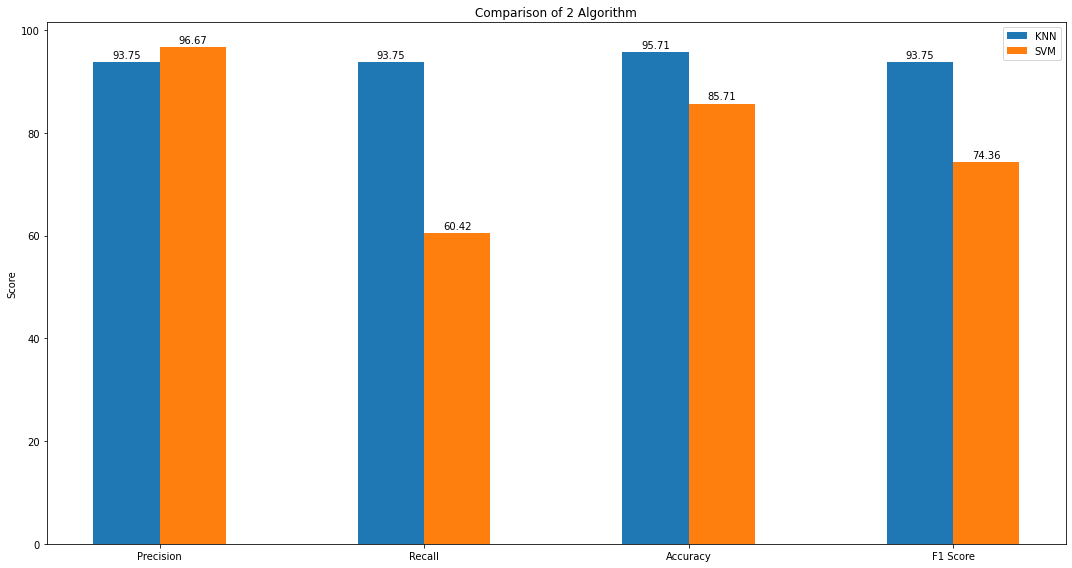

In [31]:
group = ['Precision','Recall', 'Accuracy', 'F1 Score']
data_KNN = [KNN_ps, KNN_rs, KNN_as, KNN_f1]
data_SVM = [SVM_ps, SVM_rs, SVM_as, SVM_f1]


KNN_array = np.array(data_KNN)
percentage_KNN = KNN_array * 100
rounded_KNN = np.round(percentage_KNN, 2)

SVM_array = np.array(data_SVM)
percentage_SVM = SVM_array * 100
rounded_SVM = np.round(percentage_SVM, 2)

plt.rcParams["figure.figsize"] = (15,8)

width = 0.25

x = np.arange(len(group))

fig, ax = plt.subplots()
KNN_bar = ax.bar(x - width/2, rounded_KNN, width, label='KNN')
SVM_bar = ax.bar(x + width/2, rounded_SVM, width, label='SVM')

ax.set_ylabel('Score')
ax.set_title('Comparison of 2 Algorithm')
ax.set_xticks(x,group)
ax.legend()

ax.bar_label(KNN_bar, padding=2)
ax.bar_label(SVM_bar, padding=2)

fig.tight_layout()
plt.show()